In [1]:
import ramCOH.functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = "./olivine/PI052-05_2021_11_29_15_47_53_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [ ]:
amplitudes, centers, widths = f._find_peak_parameters(x, y, 2)
centers, widths

In [ ]:
ranges = f._get_peakFit_ranges(centers, widths, 4)
ranges

In [ ]:
test = ranges[0]
xtrim, ytrim = f._trimxy_ranges(x, y, test)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.show()

In [ ]:
params, r2, fit_noise = f.deconvolve_curve(xtrim, ytrim, noise_threshold= 1.4, prominence=3)
print(r2, fit_noise)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorenz(xtrim, *params))
plt.plot(xtrim, ytrim - f.sum_GaussLorenz(xtrim, *params))
# plt.plot(xtrim, )
plt.show()

In [3]:
birs = np.array(
    [
        [100, 260],
        [370, 380],
        [460, 515],
        [660, 740],
        [990, 4000]
    ]
)

In [58]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(birs)
olivine.deconvolve(noise_threshold= 3, prominence=0.5, fit_window=3, baseline0=False, max_iterations=15)

In [59]:
paramDict = [
    {"center": i, "amplitude": j, "width": k, "shape": l, "baselevel": m}
    for _, (i, j, k, l, m) in enumerate(zip(*olivine.deconvolution_parameters))
]

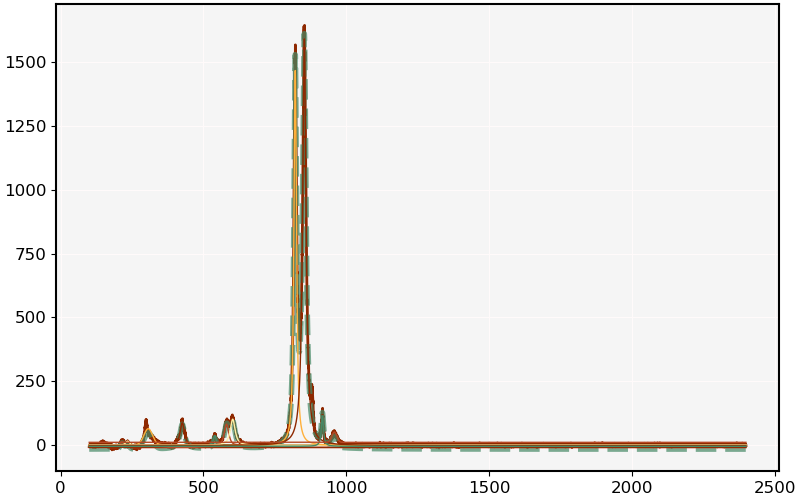

In [61]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorenz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
for curve in paramDict:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1)

In [ ]:
amplitudes, centers, widths = f._find_peak_parameters(x=x, y=olivine.intensities["BC"], prominence=2)

min_width = np.diff(olivine.x).mean() * 6
keep = np.where(widths > min_width)
amplitudes = amplitudes[keep]
centers = centers[keep]
widths = widths[keep]

ranges = f._get_peakFit_ranges(centers, widths, fit_window=4)
ranges
amplitudes, centers, widths


In [ ]:
noise_threshold = 1.3
peak_prominence=2
fitted_parameters = []
for range in ranges:
    xtrim, ytrim = f._trimxy_ranges(olivine.x, olivine.intensities["BC"], range)
    parameters, *_ = f.deconvolve_curve(x=xtrim, y=ytrim, noise_threshold=noise_threshold, prominence=peak_prominence)
    fitted_parameters.append(parameters)
fitted_parameters

In [ ]:
deconvolution = []
for parameter in zip(*fitted_parameters):
    deconvolution.append(np.concatenate(parameter))
deconvolution

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorenz(olivine.x, *deconvolution))

In [ ]:
min_width = np.diff(olivine.x).mean() * 6
np.where(widths > min_width) & np.where

In [ ]:
test = np.array([1,2,3,4,5])

In [ ]:
test[-2:] = [0] * 2

In [ ]:
test

In [ ]:
# test = 0
test += 1
test

In [ ]:
test <= 5